In [3]:
print(type(1<0))
print(4*(1>0))
print(4*(1<0))
print("bool型はTRUE（１）orFALSE(0）)")

<class 'bool'>
4
0
bool型はTRUE（１）orFALSE(0）)


In [4]:
import numpy as np
print(np.random.rand())

0.15896958364551972


In [5]:
import numpy as np
import matplotlib.pyplot as plt
#data
np.random.seed(seed=0)#乱数固定
X_min,X_max=0,2.5#ｘの上限と下限
N=30#データ数
col=["cornflowerblue","gray"]#クラス０クラス１色
X=np.zeros(N)#空のX
T=np.zeros(N,dtype=np.uint8)#2**8の０～２６５の符号なし整数空のT
prm_s=[0.4,0.8]#[０の分布開始地点,１の分布開始地点]
prm_w=[0.8,1.6]#クラス０と１の分布の幅[0,1]
prm_pi=0.5#クラス０の全体での比率
for n in range(N):
    r=np.random.rand()
    T[n]=0*(r<prm_pi)+1*(r>prm_pi)
    X[n]=prm_s[T[n]]+np.random.rand()*prm_w[T[n]]#0なら0.4,１なら０．８＋randmuniform×分布の幅
#drawing data
print("X=",np.round(X,2))
print("T=",T)


X= [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T= [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


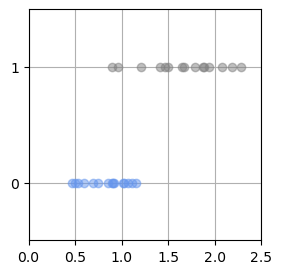

In [6]:
def show_data1d(x,t):
    for k in range(2):
        plt.plot( 
            x[t==k],t[t==k],col[k],
            alpha=0.5,linestyle="none",marker="o",
        )
           
    plt.xticks(np.arange(0,3,0.5))
    plt.yticks([0,1])
    plt.xlim(X_min,X_max)
    plt.ylim(-0.5,1.5)
#main
fig=plt.figure(figsize=(3,3))
show_data1d(X,T)
plt.grid()
plt.show()

In [7]:
#ロジスティック回帰モデル
def logistic(x,w):
    y=1/(1+np.exp(-(w[0]*x+w[1])))
    return y

decision boundary=1.25


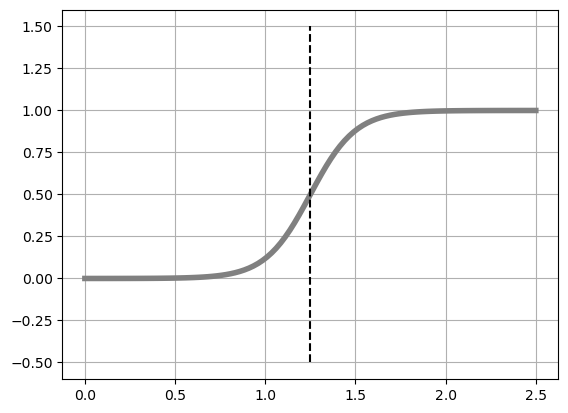

In [8]:
#ロジスティック回帰モデル表示
def show_logistic(w):
    x=np.linspace(X_min,X_max,100)
    y=logistic(x,w)
    plt.plot(x,y,"gray",linewidth=4)
    #決定境界
    i=np.min(np.where(y>0.5))
    boundary=(x[i-1]+x[i])/2
    plt.plot([boundary,boundary],[-0.5,1.5],"black",linestyle="--")
    return boundary
#TEST
w=np.array([8,-10])
b=show_logistic(w)
print(f'decision boundary={b}')
plt.grid()
plt.show()


In [9]:
#平均交差エントロピー誤差
def cee_logistic(w,x,t):
    y=logistic(x,w)
    cee=0
    for n in range(len(y)):
        cee=cee-(t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
    cee=cee/N
    return cee
#test
w=np.array([1,1])
cee=cee_logistic(w,X,T)
print(f"CEE={cee:.6f}")    
    

CEE=1.028819


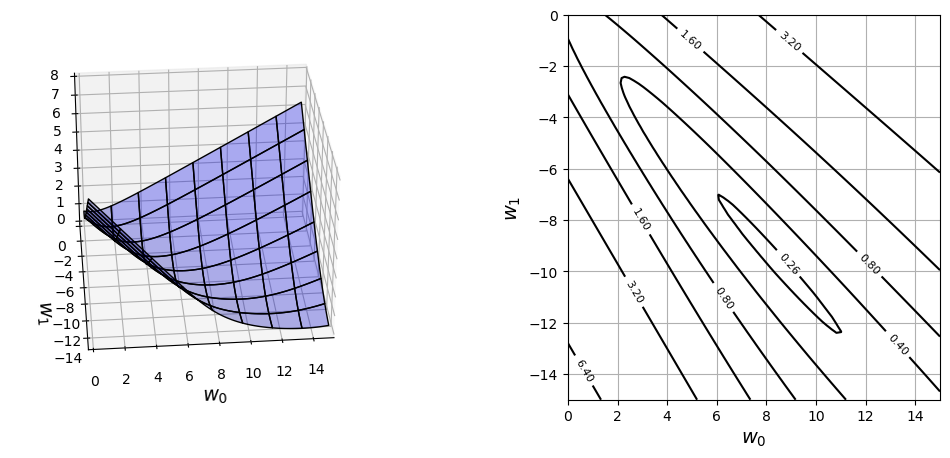

In [10]:
#平均CEEの計算
w0_n,w1_n=80,80#等高線の解像度
w0_min,w0_max=0,15
w1_min,w1_max=-15,0
w0=np.linspace(w0_min,w0_max,w0_n)
w1=np.linspace(w1_min,w1_max,w1_n)
C=np.zeros((w1_n,w0_n))
for i0 in range(w0_n):
    for i1 in range(w1_n):
        w=np.array([w0[i0],w1[i1]])
        C[i1,i0]=cee_logistic(w,X,T)
ww0,ww1=np.meshgrid(w0,w1)

#drawing graph
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
#drawing surface
ax=plt.subplot(1,2,1,projection="3d")
ax.plot_surface(
    ww0,ww1,C,
    color="blue",edgecolor="black",rstride=10,cstride=10,alpha=0.3,
)
ax.set_xlabel("$w_0$",fontsize=14)
ax.set_ylabel("$w_1$",fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)
#drawing contour
plt.subplot(1,2,2)
cont=plt.contour(
    ww0,ww1,C,
    colors="black",levels=[0.26,0.4,0.8,1.6,3.2,6.4]
)
cont.clabel(fmt="%.2f",fontsize=8)
plt.xlabel("$w_0$",fontsize=14)
plt.ylabel("$w_1$",fontsize=14)
plt.grid()
plt.show()

In [11]:
#勾配法！
#平均交差エントロピー誤差の微分
def dcee_logistic(w,x,t):
    y=logistic(x,w)
    dcee=np.zeros(2)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n])*x[n]
        dcee[1]=dcee[1]+(y[n]-t[n])
    dcee=dcee/N
    return dcee
#test
w=np.array([1,1])
#X,Tはシード値を使用それによってyが求まるlen(y)も決まる
dcee=dcee_logistic(w,X,T)
print("dCEE=",np.round(dcee,6))
    

dCEE= [0.308579 0.394855]


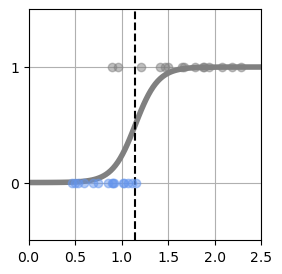

w0=8.18,w1=-9.38
CEE=0.25
boundary=1.15g


In [12]:
#list6-1-(8)
from scipy.optimize import minimize
#logistic回帰モデルのパラメータ最適化
def fit_logistic(w_init,x,t):
    res=minimize(
        cee_logistic,w_init,args=(x,t),
        jac=dcee_logistic,method="CG",
    )
    return res.x
#main
w_init=np.array([1.0,-1.0])#wの初期値
w=fit_logistic(w_init,X,T)
cee=cee_logistic(w,X,T)
#drawing graph
plt.figure(figsize=(3,3))
boundary=show_logistic(w)
show_data1d(X,T)
plt.grid()
plt.show()
#result
print(f"w0={w[0]:.2f},w1={w[1]:.2f}")
print(f"CEE={cee:.2f}")
print(f"boundary={boundary:.2f}g")
